In [5]:
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import xarray as xr
import cartopy.crs as ccrs

In [31]:
# try both arctic and west coast data, same results
#url = 'https://ferret.pmel.noaa.gov/pmel/erddap/tabledap/saildrone_arctic_data'
#url = 'https://ferret.pmel.noaa.gov/pmel/erddap/tabledap/saildrone_west_coast_survey_2018'
#url = 'https://ferret.pmel.noaa.gov/pmel/erddap/tabledap/saildrone_west_coast_survey_2018.nc?trajectory%2Clatitude%2Clongitude%2CSOG%2CCOG%2CHDG%2CHDG_WING%2CROLL%2CPITCH%2CWING_ANGLE%2CBARO_PRES_MEAN%2CBARO_PRES_STDDEV%2CTEMP_AIR_MEAN%2CTEMP_AIR_STDDEV%2CRH_MEAN%2CRH_STDDEV%2CPAR_AIR_MEAN%2CPAR_AIR_STDDEV%2CTEMP_IR_UNCOR_MEAN%2CTEMP_IR_UNCOR_STDDEV%2CUWND_MEAN%2CUWND_STDDEV%2CVWND_MEAN%2CVWND_STDDEV%2CWWND_MEAN%2CWWND_STDDEV%2CGUST_WND_MEAN%2CGUST_WND_STDDEV%2CTEMP_CTD_MEAN%2CTEMP_CTD_STDDEV%2CCOND_MEAN%2CCOND_STDDEV%2CSAL_MEAN%2CSAL_STDDEV%2CO2_RBR_CONC_MEAN%2CO2_RBR_CONC_STDDEV%2CO2_RBR_SAT_MEAN%2CO2_RBR_SAT_STDDEV%2CTEMP_O2_RBR_MEAN%2CTEMP_O2_RBR_STDDEV%2CO2_AANDERAA_CONC_UNCOR_MEAN%2CO2_AANDERAA_CONC_UNCOR_STDDEV%2CO2_AANDERAA_SAT_MEAN%2CO2_AANDERAA_SAT_STDDEV%2CTEMP_O2_AANDERAA_MEAN%2CTEMP_O2_AANDERAA_STDDEV%2CCHLOR_MEAN%2CCHLOR_STDDEV%2Ctime%2Cwind_speed%2Cwind_dir%2Cdist_partner%2CBARO_PRES_serial_number%2CAT_RH_serial_number%2CPAR_serial_number%2CTEMP_IR_serial_number%2CWIND_serial_number%2CRBR_serial_number%2CAANDERAA_serial_number&time%3E=2018-11-20T00%3A00%3A00Z&time%3C=2018-11-27T19%3A59%3A00Z'
ds_usv = xr.open_dataset(url)
ds_usv.close()
print(ds_usv)

OSError: [Errno -90] NetCDF: file not found: b'https://ferret.pmel.noaa.gov/pmel/erddap/tabledap/saildrone_west_coast_survey_2018.nc?trajectory%2Clatitude%2Clongitude%2CSOG%2CCOG%2CHDG%2CHDG_WING%2CROLL%2CPITCH%2CWING_ANGLE%2CBARO_PRES_MEAN%2CBARO_PRES_STDDEV%2CTEMP_AIR_MEAN%2CTEMP_AIR_STDDEV%2CRH_MEAN%2CRH_STDDEV%2CPAR_AIR_MEAN%2CPAR_AIR_STDDEV%2CTEMP_IR_UNCOR_MEAN%2CTEMP_IR_UNCOR_STDDEV%2CUWND_MEAN%2CUWND_STDDEV%2CVWND_MEAN%2CVWND_STDDEV%2CWWND_MEAN%2CWWND_STDDEV%2CGUST_WND_MEAN%2CGUST_WND_STDDEV%2CTEMP_CTD_MEAN%2CTEMP_CTD_STDDEV%2CCOND_MEAN%2CCOND_STDDEV%2CSAL_MEAN%2CSAL_STDDEV%2CO2_RBR_CONC_MEAN%2CO2_RBR_CONC_STDDEV%2CO2_RBR_SAT_MEAN%2CO2_RBR_SAT_STDDEV%2CTEMP_O2_RBR_MEAN%2CTEMP_O2_RBR_STDDEV%2CO2_AANDERAA_CONC_UNCOR_MEAN%2CO2_AANDERAA_CONC_UNCOR_STDDEV%2CO2_AANDERAA_SAT_MEAN%2CO2_AANDERAA_SAT_STDDEV%2CTEMP_O2_AANDERAA_MEAN%2CTEMP_O2_AANDERAA_STDDEV%2CCHLOR_MEAN%2CCHLOR_STDDEV%2Ctime%2Cwind_speed%2Cwind_dir%2Cdist_partner%2CBARO_PRES_serial_number%2CAT_RH_serial_number%2CPAR_serial_number%2CTEMP_IR_serial_number%2CWIND_serial_number%2CRBR_serial_number%2CAANDERAA_serial_number&time%3E=2018-11-20T00%3A00%3A00Z&time%3C=2018-11-27T19%3A59%3A00Z'

# The first issue is that all the variables are s.name
#### I think this is something to do with how the netcdf file is read but I've never seen this  before, ever, and I read a lot of different files.  So, just so I can try to look at the data, I'll create some new variables without the '.' in them and put some data in there to look at

In [3]:
ds_usv['lat']=ds_usv['s.latitude']
ds_usv['lon']=ds_usv['s.longitude']
ds_usv['time']=ds_usv['s.time']
ds_usv['trajectory']=ds_usv['s.trajectory']
ds_usv['SAL_MEAN']=ds_usv['s.SAL_MEAN']
ds_usv['TEMP_CTD_MEAN']=ds_usv['s.TEMP_CTD_MEAN']
ds_usv = ds_usv.swap_dims({'s':'time'})


<xarray.Dataset>
Dimensions:                          (time: 787066)
Coordinates:
  * time                             (time) datetime64[ns] 2018-07-17T18:00:00 ... 2018-10-05T18:11:00
Data variables:
    s.trajectory                     (time) |S64 ...
    s.latitude                       (time) float64 ...
    s.longitude                      (time) float64 ...
    s.SOG                            (time) float64 ...
    s.COG                            (time) float64 ...
    s.HDG                            (time) float64 ...
    s.HDG_WING                       (time) float64 ...
    s.ROLL                           (time) float64 ...
    s.PITCH                          (time) float64 ...
    s.WING_ANGLE                     (time) float64 ...
    s.BARO_PRES_MEAN                 (time) float64 ...
    s.BARO_PRES_STDDEV               (time) float64 ...
    s.TEMP_AIR_MEAN                  (time) float64 ...
    s.TEMP_AIR_STDDEV                (time) float64 ...
    s.RH_MEAN     

# when I try to do anything, even just look at the data it gives me a error I've never seen before and suggests that I try to load the data

In [7]:
ds_usv.load()

IndexError: The indexing operation you are attempting to perform is not valid on netCDF4.Variable object. Try loading your data into memory first by calling .load().

In [24]:
ds_usv['s.trajectory'].size

787066

In [28]:
ds_usv['s.trajectory'][0:5]

<xarray.DataArray 's.trajectory' (s: 5)>
array([b'1024.0', b'1025.0', b'1026.0', b'1027.0', b'1028.0'], dtype='|S64')
Dimensions without coordinates: s
Attributes:
    axis:           E
    cf_role:        trajectory_id
    comment:        A trajectory is a single deployment of a drone
    long_name:      Trajectory/Drone ID
    point_spacing:  even

In [ ]:
# but only the first 6 have any data, if you try to print out after that 
# it gives an error.  
#what should be there is either trajectory is another dimension (like other saildrone files)
# or trajectory should have same length as other arrays and just an id in it.

# used this code to figure out where the data goes bad

In [14]:
#WARNING THIS TAKES A WHILE TO RUN
ilen = ds_usv.SAL_MEAN.size
print(ilen)
tem = np.arange(ilen)*np.nan
for i in range(ilen): #787066):
    if ds_usv.SAL_MEAN[i]>20:
        tem[i]=ds_usv.SAL_MEAN[i]
tem[i:]=np.nan

787066


KeyboardInterrupt: 

In [ ]:
print('this is last point it was able to read correction:', i)
ibad = i-1 #776100

# subset the data & plot it

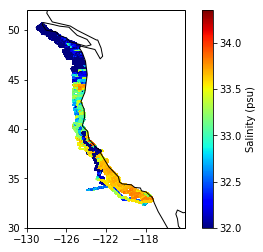

In [9]:
#there is something bad in the data file above 776100 so subset the data to just the good part
ds_usv2 = ds_usv.isel(time=slice(None,ibad))
xlon =  ds_usv2.lon.copy(deep=True)
xlat =  ds_usv2.lat.copy(deep=True)
salinity = ds_usv2.SAL_MEAN.copy(deep=True)
ax = plt.axes(projection=ccrs.PlateCarree())
cs1 = ax.scatter(xlon, xlat, s=3.0, c=salinity, edgecolor='none', cmap='jet',vmin=32,vmax=34.35)
ax.coastlines()
x1,x2,y1,y2 = -130,-114,30,52
ax.set_xlim(x1,x2)
ax.set_ylim(y1,y2)
ax.set_xticks(np.arange(x1,x2,4))
ax.set_yticks(np.arange(y1,y2,5))
cax = plt.colorbar(cs1)
cax.set_label('Salinity (psu)')
fig_fname = 'C:/Users/gentemann/Google Drive/f_drive/docs/projects/SSS/figures/wcoast_location2.png'
plt.savefig(fig_fname, transparent=False, format='png')